In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [61]:
df = pd.read_csv('international_matches.csv', parse_dates = ['date'])
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [62]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

## Question 1 - Top 10 ranked teams

In [63]:
fifa_rank = df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = fifa_rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home,away])
#Select each country latest match
fifa_rank = fifa_rank.sort_values(['team','date'],ascending=[True,False])
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank',ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


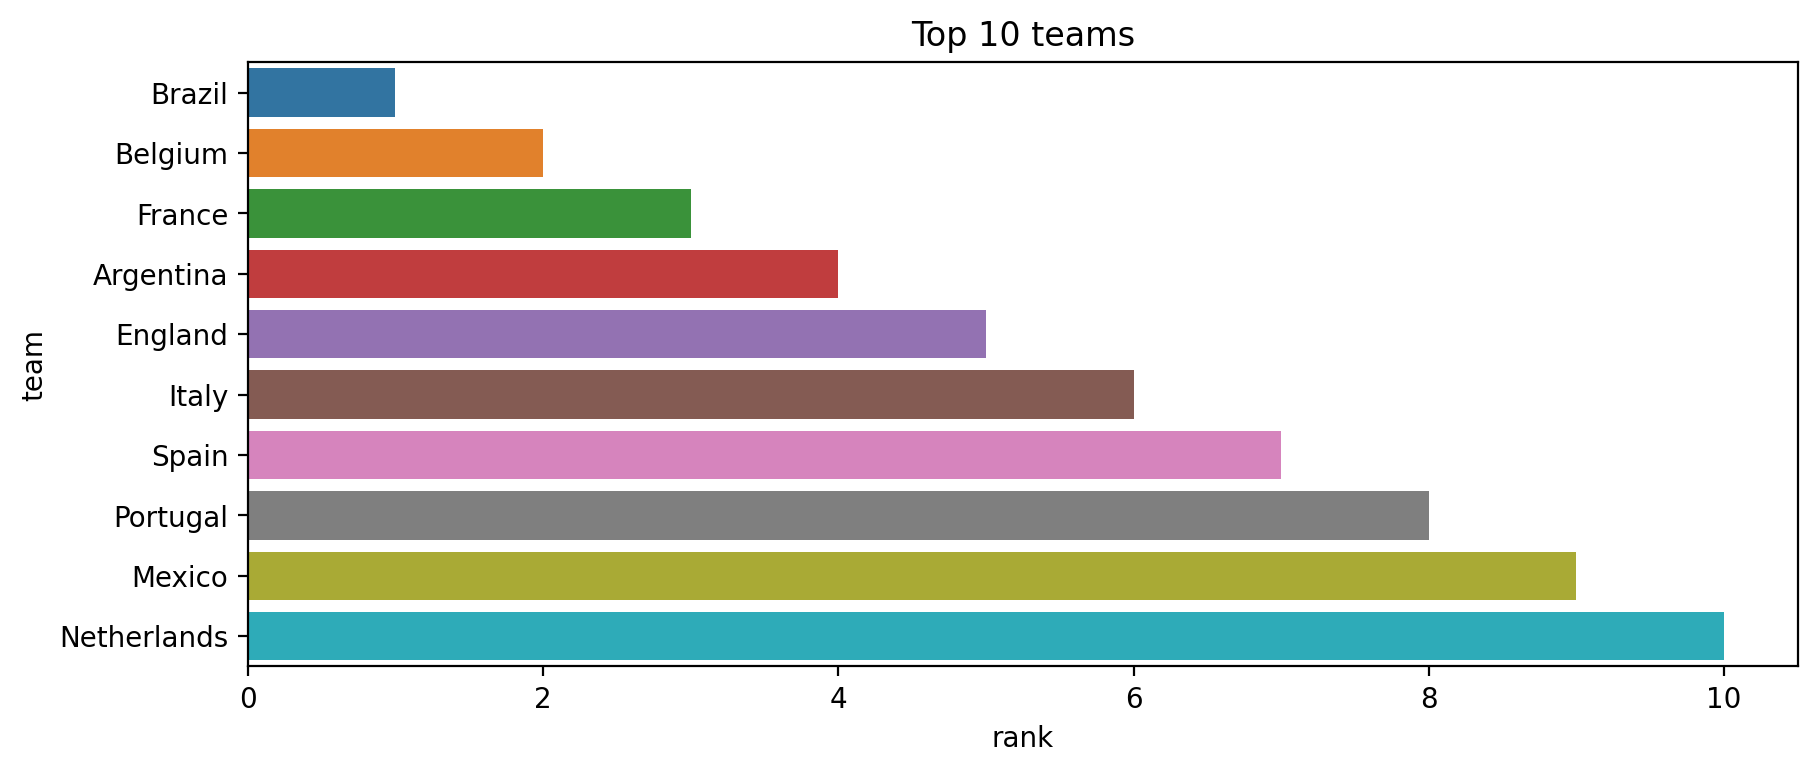

In [64]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=fifa_rank_top10,y='team',x='rank')
plt.title("Top 10 teams");

## Win percentage of top 10 teams

In [65]:
def home_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    return round(score)

In [66]:
fifa_rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Average_win_Per'] = round((fifa_rank_top10['Home_win_Per'] + fifa_rank_top10['Away_win_Per'])/2)
fifa_rank_win = fifa_rank_top10.sort_values('Average_win_Per',ascending=False)
fifa_rank_win

,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Per
0,Brazil,2022-06-06,1,78,60,69.0
6,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
7,Portugal,2022-06-12,8,67,49,58.0
9,Netherlands,2022-06-14,10,62,55,58.0
5,Italy,2022-06-14,6,60,49,54.0
1,Belgium,2022-06-14,2,60,46,53.0
8,Mexico,2022-06-14,9,60,41,50.0


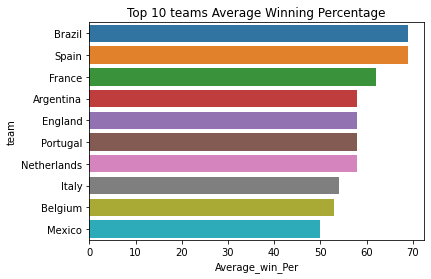

In [67]:
sns.barplot(data=fifa_rank_win,x='Average_win_Per',y='team')
plt.title("Top 10 teams Average Winning Percentage");

## Top 10 Attacking team

In [68]:
fifa_offense = df[['date', 'home_team', 'away_team','home_team_mean_offense_score','away_team_mean_offense_score']]
home = fifa_offense[['date','home_team','home_team_mean_offense_score']].rename(columns={"home_team":"team","home_team_mean_offense_score":"offense_score"})
away = fifa_offense[['date','away_team','away_team_mean_offense_score']].rename(columns={"away_team":"team","away_team_mean_offense_score":"offense_score"})
fifa_offense = pd.concat([home,away])
fifa_offense = fifa_offense.sort_values(['date','team'],ascending=[False,True])
fifa_offense_top10 = fifa_offense.groupby('team').first().sort_values('offense_score',ascending=False)[0:10].reset_index()
fifa_offense_top10

,team,date,offense_score
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


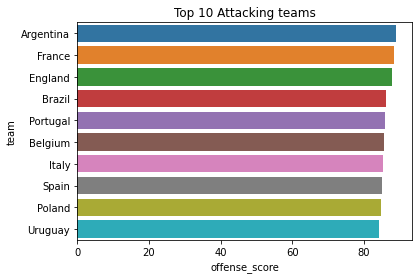

In [69]:
sns.barplot(data=fifa_offense_top10,x='offense_score',y='team')
plt.title("Top 10 Attacking teams");

## Top 10 Midfield team

In [70]:
fifa_midfield = df[['date', 'home_team', 'away_team','home_team_mean_midfield_score','away_team_mean_midfield_score']]
home = fifa_midfield[['date','home_team','home_team_mean_midfield_score']].rename(columns={"home_team":"team","home_team_mean_midfield_score":"midfield_score"})
away = fifa_midfield[['date','away_team','away_team_mean_midfield_score']].rename(columns={"away_team":"team","away_team_mean_midfield_score":"midfield_score"})
fifa_midfield = pd.concat([home,away])
fifa_midfield = fifa_midfield.sort_values(['date','team'],ascending=[False,True])
fifa_midfield_top10 = fifa_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:10].reset_index()
fifa_midfield_top10

,team,date,midfield_score
0,Germany,2022-06-14,87.8
1,France,2022-06-13,86.8
2,Spain,2022-06-12,86.0
3,Belgium,2022-06-14,85.5
4,Brazil,2022-06-06,85.5
5,Portugal,2022-06-12,84.5
6,Italy,2022-06-14,84.5
7,Croatia,2022-06-13,84.2
8,England,2022-06-14,84.0
9,Argentina,2022-06-05,84.0


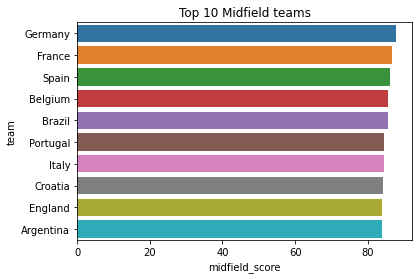

In [71]:
sns.barplot(data=fifa_midfield_top10,x='midfield_score',y='team')
plt.title("Top 10 Midfield teams");

## Top 10 defense team

In [72]:
fifa_defense = df[['date', 'home_team', 'away_team','home_team_mean_defense_score','away_team_mean_defense_score']]
home = fifa_defense[['date','home_team','home_team_mean_defense_score']].rename(columns={"home_team":"team","home_team_mean_defense_score":"defense_score"})
away = fifa_defense[['date','away_team','away_team_mean_defense_score']].rename(columns={"away_team":"team","away_team_mean_defense_score":"defense_score"})
fifa_defense = pd.concat([home,away])
fifa_defense = fifa_defense.sort_values(['date','team'],ascending=[False,True])
fifa_defense_top10 = fifa_defense.groupby('team').first().sort_values('defense_score',ascending=False)[0:10].reset_index()
fifa_defense_top10

,team,date,defense_score
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


Text(0.5, 1.0, 'Top 10 Defense Teams')

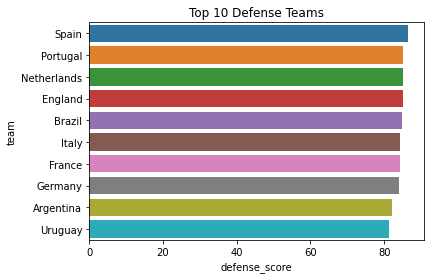

In [73]:
sns.barplot(data=fifa_defense_top10,x='defense_score',y='team')
plt.title("Top 10 Defense Teams")

### Analyze and fill na's

In [74]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [75]:
#We can fill mean for na's in goal_keeper_score
df[df['home_team'] == "Brazil"]['home_team_goalkeeper_score'].describe()

count    135.000000
mean      86.074074
std        3.327026
min       82.000000
25%       83.000000
50%       86.000000
75%       89.000000
max       93.000000
Name: home_team_goalkeeper_score, dtype: float64

In [76]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

In [77]:
#We can fill mean for na's in defense score
df[df['away_team'] == "Uruguay"]['home_team_mean_defense_score'].describe()

count    105.000000
mean      76.580000
std        5.589988
min       58.500000
25%       73.200000
50%       76.500000
75%       80.000000
max       89.500000
Name: home_team_mean_defense_score, dtype: float64

In [78]:
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

In [79]:
#We can fill mean for na's in offense score
df[df['away_team'] == "Uruguay"]['home_team_mean_offense_score'].describe()

count    117.000000
mean      78.136752
std        5.878813
min       66.700000
25%       74.000000
50%       78.000000
75%       82.300000
max       90.300000
Name: home_team_mean_offense_score, dtype: float64

In [80]:
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

In [81]:
#We can fill mean for na's in midfield score
df[df['away_team'] == "Uruguay"]['home_team_mean_midfield_score'].describe()

count    110.000000
mean      77.729091
std        5.656617
min       63.200000
25%       75.050000
50%       77.650000
75%       81.425000
max       89.500000
Name: home_team_mean_midfield_score, dtype: float64

In [82]:
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

In [83]:
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
dtype: int64

In [84]:
#Teams are not available in FIFA game itself, so they are not less than average performing teams, so giving a average score of 50 for all.
df.fillna(50,inplace=True)

In [85]:
#Filter the teams participating in World cup 22
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]

## Task = Top 10 teams in Worldcup 22 with individual winning percentage

In [86]:
rank = final_df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
rank = pd.concat([home,away])
#Select each country latest match
rank = rank.sort_values(['team','date'],ascending=[True,False])
rank_top10 = rank.groupby('team').first().sort_values('rank',ascending=True).reset_index()
rank_top10 = rank_top10[(rank_top10["team"].apply(lambda x: x in list_2022))][0:10]
rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10
10,Denmark,2022-06-13,11


In [87]:
rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(rank_top10['team'])
rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(rank_top10['team'])
rank_top10['Average_win_Per'] = round((rank_top10['Home_win_Per'] + rank_top10['Away_win_Per'])/2)
rank_top10_Win = rank_top10.sort_values('Average_win_Per',ascending=False)
rank_top10_Win

,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Per
0,Brazil,2022-06-06,1,78,60,69.0
6,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
7,Portugal,2022-06-12,8,67,49,58.0
9,Netherlands,2022-06-14,10,62,55,58.0
1,Belgium,2022-06-14,2,60,46,53.0
8,Mexico,2022-06-14,9,60,41,50.0
10,Denmark,2022-06-13,11,56,45,50.0


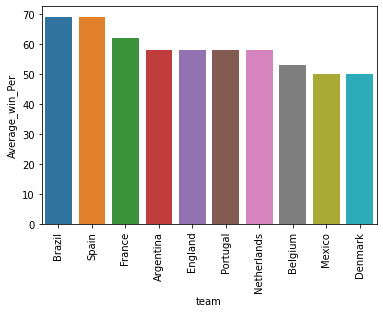

In [88]:
sns.barplot(data=rank_top10_Win,x='team',y='Average_win_Per')
plt.xticks(rotation=90);

In [89]:
#Mapping numeric values for home_team_result to find the correleations
final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

C:\Users\haekyu\AppData\Local\Temp\ipykernel_8704\3165474010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})


In [90]:
final_df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_mean_offense_score     0.165981
home_team_mean_defense_score     0.158841
home_team_mean_midfield_score    0.157639
home_team_score                  0.127916
home_team_goalkeeper_score       0.122509
away_team_fifa_rank              0.111366
home_team_total_fifa_points      0.015498
away_team_total_fifa_points     -0.047726
neutral_location                -0.066361
away_team_mean_offense_score    -0.117055
away_team_mean_defense_score    -0.122354
away_team_goalkeeper_score      -0.124837
away_team_mean_midfield_score   -0.127505
home_team_fifa_rank             -0.186355
away_team_score                 -0.464635
Name: home_team_result, dtype: float64

In [91]:
#Dropping unnecessary colums
final_df = final_df.drop(['date', 'home_team_continent','away_team_continent','home_team_total_fifa_points', 'away_team_total_fifa_points','home_team_score', 'away_team_score', 'tournament', 'city', 'country','neutral_location', 'shoot_out'],axis=1)

In [92]:
final_df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [93]:
#change column names
final_df.rename(columns={"home_team":"Team1", "away_team": "Team2", "home_team_fifa_rank": "Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"},inplace=True)

<AxesSubplot:>

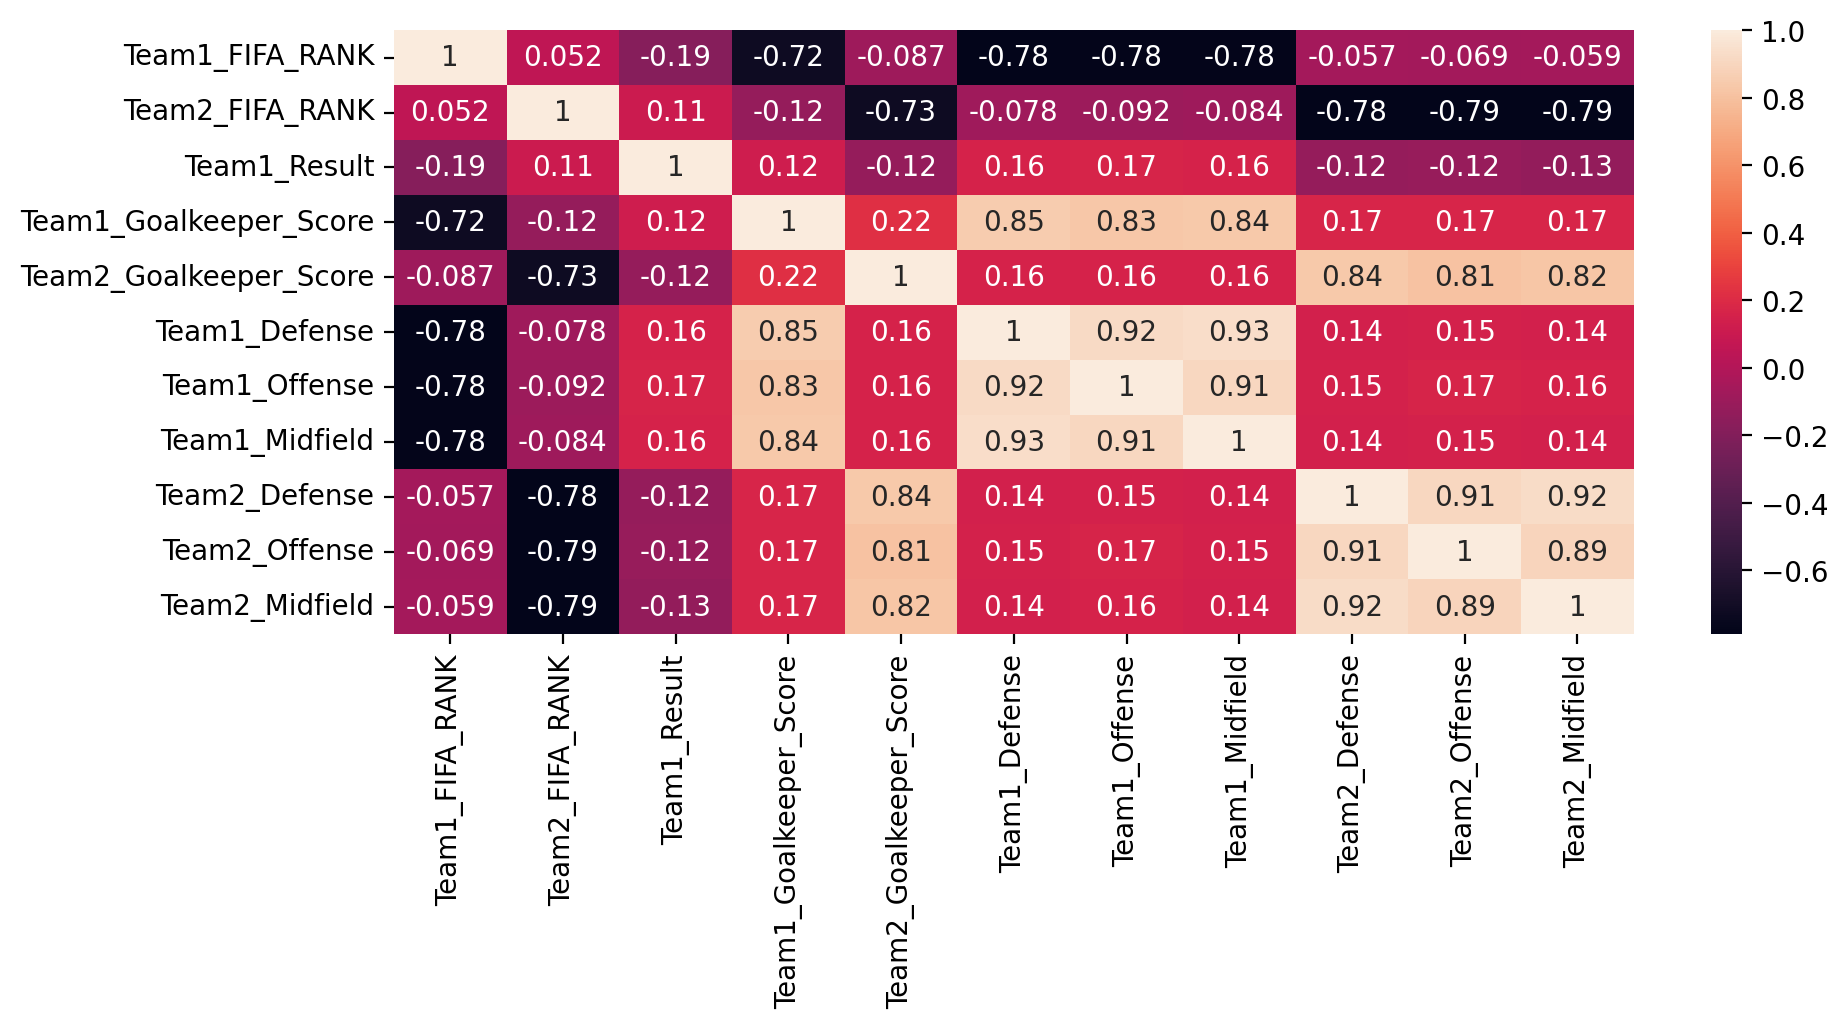

In [94]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(final_df.corr(),annot=True)

In [95]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9321 entries, 0 to 23920
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team1                   9321 non-null   object 
 1   Team2                   9321 non-null   object 
 2   Team1_FIFA_RANK         9321 non-null   int64  
 3   Team2_FIFA_RANK         9321 non-null   int64  
 4   Team1_Result            9321 non-null   int64  
 5   Team1_Goalkeeper_Score  9321 non-null   float64
 6   Team2_Goalkeeper_Score  9321 non-null   float64
 7   Team1_Defense           9321 non-null   float64
 8   Team1_Offense           9321 non-null   float64
 9   Team1_Midfield          9321 non-null   float64
 10  Team2_Defense           9321 non-null   float64
 11  Team2_Offense           9321 non-null   float64
 12  Team2_Midfield          9321 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1019.5+ KB


In [96]:
#Holdout another DF for pipeline
pipe_DF = final_df
#Create dummies for categorical columns
final_df = pd.get_dummies(final_df)

In [97]:
#split X and y and train test split (For League Matches)
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
#Validtion and test set
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [98]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [99]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

              precision    recall  f1-score   support

           0       0.43      0.44      0.44       389
           1       0.62      0.59      0.60       692
           2       0.24      0.25      0.25       318

    accuracy                           0.47      1399
   macro avg       0.43      0.43      0.43      1399
weighted avg       0.48      0.47      0.48      1399



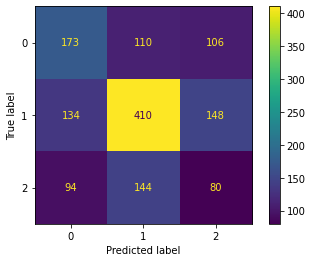

In [100]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
metrics_display(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.52      0.59      0.56       389
           1       0.67      0.79      0.72       692
           2       0.31      0.14      0.19       318

    accuracy                           0.59      1399
   macro avg       0.50      0.51      0.49      1399
weighted avg       0.55      0.59      0.56      1399



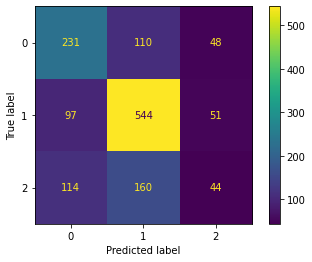

In [101]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       389
           1       0.63      0.85      0.72       692
           2       0.40      0.05      0.09       318

    accuracy                           0.59      1399
   macro avg       0.52      0.49      0.46      1399
weighted avg       0.55      0.59      0.53      1399



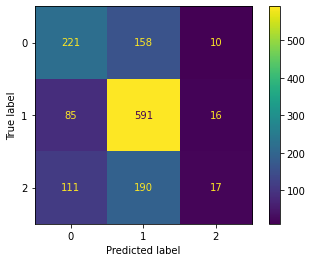

In [102]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.53      0.58      0.55       389
           1       0.64      0.80      0.71       692
           2       0.32      0.11      0.16       318

    accuracy                           0.58      1399
   macro avg       0.50      0.50      0.48      1399
weighted avg       0.54      0.58      0.54      1399



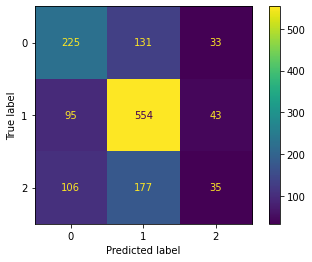

In [103]:
#XGB Boost
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

In [104]:
X_train.shape

(6524, 404)

Epoch 1/10
164/164 [==============================] - 1s 6ms/step - loss: 1.0171 - accuracy: 0.5258 - val_loss: 0.8979 - val_accuracy: 0.5870
Epoch 2/10
164/164 [==============================] - 1s 4ms/step - loss: 0.9058 - accuracy: 0.5844 - val_loss: 0.8947 - val_accuracy: 0.5916
Epoch 3/10
164/164 [==============================] - 1s 3ms/step - loss: 0.8774 - accuracy: 0.6066 - val_loss: 0.9059 - val_accuracy: 0.5847
Epoch 4/10
164/164 [==============================] - 1s 4ms/step - loss: 0.8487 - accuracy: 0.6082 - val_loss: 0.9030 - val_accuracy: 0.5816
Epoch 5/10
164/164 [==============================] - 1s 3ms/step - loss: 0.8307 - accuracy: 0.6254 - val_loss: 0.9001 - val_accuracy: 0.5877
Epoch 6/10
164/164 [==============================] - 1s 4ms/step - loss: 0.8225 - accuracy: 0.6285 - val_loss: 0.8978 - val_accuracy: 0.5893
Epoch 7/10
164/164 [==============================] - 1s 3ms/step - loss: 0.8074 - accuracy: 0.6342 - val_loss: 0.9112 - val_accuracy: 0.5816
Epoch 

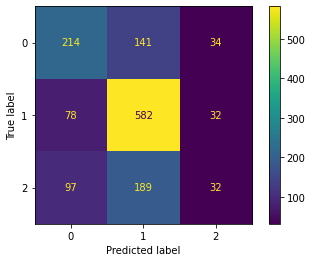

In [105]:
#simple Neural network
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

model = Sequential()
model.add(Input(shape=(404,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.52      0.59      0.55       394
           1       0.63      0.78      0.70       666
           2       0.22      0.08      0.12       338

    accuracy                           0.56      1398
   macro avg       0.46      0.49      0.46      1398
weighted avg       0.50      0.56      0.52      1398



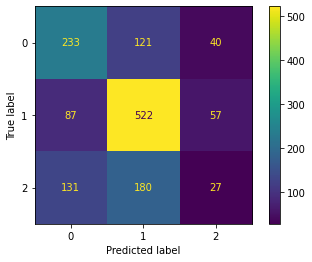

In [106]:
#Checking the final score on testing the holdout test in XGB
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [107]:
#XGB Model is finalised, so creating a pipeline for it
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

In [108]:
#Dumping the pipeline model
import joblib
#joblib.dump(pipe_League,"League_Predictions.pkl")

# Predictions for Knockout Stage - Removing Draw status

In [109]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [110]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       388
           1       0.81      0.85      0.83       695

    accuracy                           0.77      1083
   macro avg       0.76      0.74      0.75      1083
weighted avg       0.77      0.77      0.77      1083



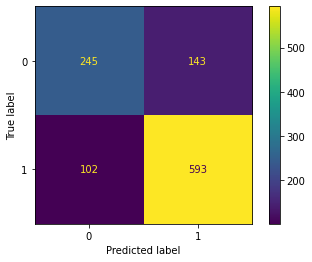

In [111]:
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       405
           1       0.80      0.82      0.81       677

    accuracy                           0.76      1082
   macro avg       0.74      0.73      0.74      1082
weighted avg       0.75      0.76      0.76      1082



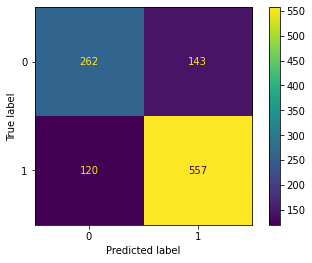

In [112]:
#Random Forest is giving good accuracy, so testing with holdout test and finalising the model
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [113]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),RandomForestClassifier())
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
#joblib.dump(pipe_knock,"KnockOut_Predictions.pkl")